# Regression

In [1]:
# import packages and read csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

features = pd.read_csv('DTI_with_group_num.csv')
features.head(5)

,IMAGEUID,COLPROT,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,MANUFACTURER,VOLUMES,RUNDATE,...,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,update_stamp,Sex,Research Group,Age
0,957753,ADNI3,21,init,m144,1/25/18,2.0,Siemens,55,12/1/21,...,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,NaN,F,0,84.9
1,987377,ADNI3,31,init,m150,4/17/18,NaN,Siemens,127,12/1/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0,90.3
2,1158142,ADNI3,31,y1,m162,4/24/19,2.0,Siemens,127,12/1/21,...,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,NaN,F,0,91.3
3,1116459,ADNI3,56,y1,m156,1/10/19,2.0,Siemens,127,12/1/21,...,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,NaN,F,0,82.8
4,1189755,ADNI3,56,init,m144,11/28/17,2.0,Siemens,127,12/1/21,...,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,NaN,F,0,81.7


In [2]:
features.describe()

,IMAGEUID,RID,VERSION,VOLUMES,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,...,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,update_stamp,Research Group,Age
count,9.680000e+02,968.000000,934.0,968.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,...,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,0.0,968.000000,968.000000
mean,1.019289e+06,5138.766529,2.0,62.929752,0.001077,0.000982,0.001447,0.001502,0.001544,0.002359,...,0.000634,0.000611,0.001142,0.000477,0.000548,0.000615,0.000562,NaN,1.348140,74.619731
std,1.102226e+05,1763.616817,0.0,34.340940,0.000060,0.000077,0.000073,0.000081,0.000088,0.000246,...,0.000106,0.000058,0.000233,0.000039,0.000074,0.000057,0.000044,NaN,1.614847,7.880330
min,8.088260e+05,21.000000,2.0,31.000000,0.000829,0.000679,0.001210,0.001214,0.001234,0.001629,...,0.000460,0.000441,0.000625,0.000350,0.000373,0.000502,0.000430,NaN,0.000000,55.100000
25%,9.353970e+05,4394.250000,2.0,36.000000,0.001046,0.000939,0.001404,0.001447,0.001496,0.002186,...,0.000561,0.000573,0.000979,0.000452,0.000497,0.000577,0.000533,NaN,0.000000,69.000000
50%,1.005818e+06,6066.500000,2.0,55.000000,0.001082,0.000990,0.001448,0.001498,0.001547,0.002349,...,0.000610,0.000602,0.001117,0.000473,0.000536,0.000604,0.000557,NaN,0.000000,74.150000
75%,1.099537e+06,6370.250000,2.0,55.000000,0.001116,0.001033,0.001491,0.001551,0.001601,0.002503,...,0.000683,0.000641,0.001282,0.000499,0.000595,0.000642,0.000586,NaN,3.000000,80.600000
max,1.332415e+06,6832.000000,2.0,127.000000,0.001266,0.001214,0.001666,0.001790,0.001807,0.003424,...,0.001140,0.000892,0.001913,0.000659,0.000836,0.001018,0.000772,NaN,5.000000,95.900000


In [3]:
# remove unnecessary columns
features = features.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 
                          'VISCODE2', 'EXAMDATE', 'VERSION', 'MANUFACTURER',
                         'RUNDATE', 'STATUS', 'QC', 'update_stamp'], axis=1)

# remove rows with empty values
features = features.dropna()

features.head(5)

,VOLUMES,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,...,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Sex,Research Group,Age
0,55,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,...,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,F,0,84.9
2,127,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,...,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,F,0,91.3
3,127,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,...,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,F,0,82.8
4,127,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,...,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,F,0,81.7
5,127,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,...,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,F,0,83.7


In [4]:
labels = np.array(features['Research Group'])
features = features.drop('Research Group', axis=1)

# one-hot encode
features = pd.get_dummies(features)

feature_list = list(features.columns)
features = np.array(features)

In [5]:
# split dataset into training and testing
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=53)

In [6]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model with decision trees
rf = RandomForestRegressor(n_estimators = 9000, random_state = 53)

# Train the model on training data
rf.fit(train_features, train_labels);

In [7]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 5))

Mean Absolute Error: 1.2508


In [8]:
# get numerical features importance
importances = list(rf.feature_importances_)

# list of tuples with variance and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# sort features importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out features and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: MD_CGH_R             Importance: 0.02235
Variable: Age                  Importance: 0.02049
Variable: AD_GCC               Importance: 0.0164
Variable: RD_CGH_R             Importance: 0.01556
Variable: MD_CGH               Importance: 0.01384
Variable: RD_SCC               Importance: 0.01233
Variable: FA_FX                Importance: 0.01217
Variable: FA_SCC               Importance: 0.01135
Variable: FA_PTR_L             Importance: 0.00993
Variable: AD_SFO_R             Importance: 0.00845
Variable: FA_RLIC_R            Importance: 0.00834
Variable: AD_FXST_L            Importance: 0.0083
Variable: MD_UNC_L             Importance: 0.00723
Variable: AD_SS_L              Importance: 0.00711
Variable: AD_UNC_L             Importance: 0.00661
Variable: MD_SCC               Importance: 0.0064
Variable: AD_FXST              Importance: 0.00603
Variable: FA_PCT               Importance: 0.00603
Variable: FA_FXST_L            Importance: 0.00592
Variable: AD_SCC               Imp

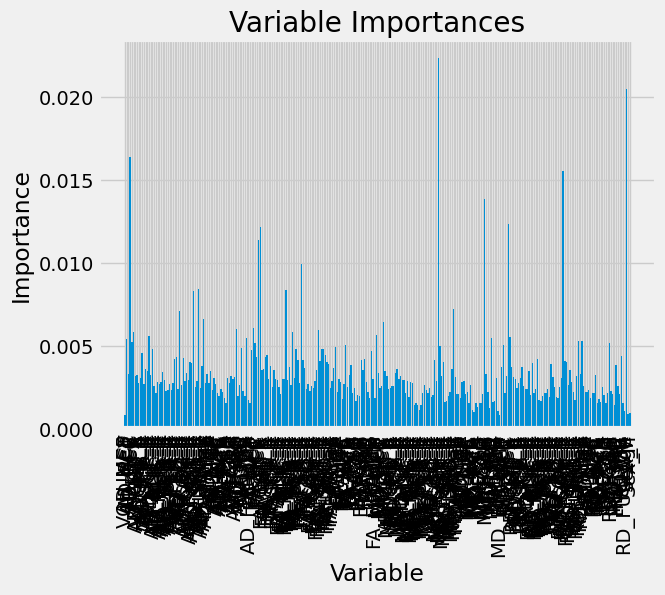

In [9]:
%matplotlib inline

plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Feature selection

In [10]:
# new model with only the most important structures
rf_most_important = RandomForestRegressor(n_estimators = 12000, random_state = 70)

important_indices = [feature_list.index('AD_SLF_L'), feature_list.index('MD_SLF_L'), feature_list.index('RD_SLF_L'),
                    feature_list.index('FA_SLF_L'), feature_list.index('AD_UNC'), feature_list.index('RD_UNC'), 
                    feature_list.index('MD_UNC'), feature_list.index('FA_UNC'), feature_list.index('AD_UNC_L'),
                    feature_list.index('MD_UNC_L'), feature_list.index('RD_UNC_L'), feature_list.index('FA_UNC_L'),
                    feature_list.index('AD_SCC'), feature_list.index('MD_SCC'), feature_list.index('RD_SCC'), 
                    feature_list.index('FA_SCC'), feature_list.index('AD_CGH_R'), feature_list.index('MD_CGH_R'),
                    feature_list.index('RD_CGH_R'), feature_list.index('FA_CGH_R'), feature_list.index('AD_CGH_L'),
                    feature_list.index('MD_CGH_L'), feature_list.index('RD_CGH_L'), feature_list.index('FA_CGH_L'),
                    feature_list.index('AD_SCP_R'), feature_list.index('MD_SCP_R'), feature_list.index('RD_SCP_R'),
                    feature_list.index('FA_SCP_R'), feature_list.index('AD_SCP_L'), feature_list.index('MD_SCP_L'),
                    feature_list.index('RD_SCP_L'), feature_list.index('FA_SCP_L'), feature_list.index('AD_SCP'), 
                    feature_list.index('MD_SCP'), feature_list.index('RD_SCP'), feature_list.index('FA_SCP'),
                    feature_list.index('AD_BCC'), feature_list.index('MD_BCC'), feature_list.index('RD_BCC'),
                    feature_list.index('FA_BCC')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

rf_most_important.fit(train_important, train_labels)

predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 5))

Mean Absolute Error: 1.32768


## Combining MCI subgroups

In [11]:
new_features = pd.read_csv('DTI_with_group_num_comb.csv')
new_features.head(5)

,IMAGEUID,COLPROT,RID,VISCODE,VISCODE2,EXAMDATE,VERSION,MANUFACTURER,VOLUMES,RUNDATE,...,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,update_stamp,Sex,Research Group,Age
0,957753,ADNI3,21,init,m144,1/25/18,2.0,Siemens,55,12/1/21,...,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,NaN,F,0,84.9
1,987377,ADNI3,31,init,m150,4/17/18,NaN,Siemens,127,12/1/21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,0,90.3
2,1158142,ADNI3,31,y1,m162,4/24/19,2.0,Siemens,127,12/1/21,...,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,NaN,F,0,91.3
3,1116459,ADNI3,56,y1,m156,1/10/19,2.0,Siemens,127,12/1/21,...,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,NaN,F,0,82.8
4,1189755,ADNI3,56,init,m144,11/28/17,2.0,Siemens,127,12/1/21,...,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,NaN,F,0,81.7


In [12]:
# remove unnecessary columns and confounding variables
new_features = new_features.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'VERSION', 
                                  'MANUFACTURER', 'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'VOLUMES',
                                 'Sex', 'Age'], axis=1)

# remove rows with empty values
new_features = new_features.dropna()

new_features.head(5)

,AD_MCP,AD_PCT,AD_GCC,AD_BCC,AD_SCC,AD_FX,AD_CST_R,AD_CST_L,AD_ML_R,AD_ML_L,...,RD_FXST,RD_SLF,RD_SFO,RD_UNC,RD_TAP,RD_IC,RD_CC,RD_CR,RD_FULLWM,Research Group
0,0.001177,0.000974,0.001479,0.001474,0.001575,0.002257,0.001079,0.001081,0.001285,0.001287,...,0.000662,0.000577,0.000551,0.000600,0.001139,0.000491,0.000562,0.000638,0.000571,0
2,0.001213,0.001075,0.001567,0.001585,0.001686,0.002492,0.001046,0.001056,0.001149,0.001126,...,0.000769,0.000694,0.000902,0.000717,0.001507,0.000626,0.000701,0.000851,0.000723,0
3,0.001101,0.000965,0.001440,0.001433,0.001456,0.002379,0.000985,0.000990,0.001118,0.001113,...,0.000614,0.000546,0.000562,0.000553,0.000950,0.000448,0.000512,0.000587,0.000531,0
4,0.001053,0.000904,0.001433,0.001470,0.001450,0.002421,0.000966,0.000977,0.001047,0.001041,...,0.000607,0.000535,0.000551,0.000530,0.000862,0.000437,0.000509,0.000573,0.000522,0
5,0.001131,0.000974,0.001469,0.001498,0.001531,0.002291,0.000994,0.001017,0.001128,0.001105,...,0.000621,0.000559,0.000586,0.000558,0.000901,0.000458,0.000527,0.000605,0.000545,0


In [ ]:
new_labels = np.array(new_features['Research Group'])
new_features = new_features.drop('Research Group', axis=1)

new_feature_list = list(new_features.columns)
new_features = np.array(new_features)

In [ ]:
# split dataset into training and testing
new_train_features, new_test_features, new_train_labels, new_test_labels = train_test_split(new_features, new_labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# instantiate model with decision trees
new_rf = RandomForestRegressor(n_estimators = 9000, random_state = 42)

# Train the model on training data
new_rf.fit(new_train_features, new_train_labels);

In [ ]:
new_predictions = new_rf.predict(new_test_features)
new_errors = abs(new_predictions - new_test_labels)
print('Mean Absolute Error:', round(np.mean(new_errors), 5))

In [ ]:
# get numerical features importance
new_importances = list(new_rf.feature_importances_)

# list of tuples with variance and importance
new_feature_importances = [(new_feature, round(new_importance, 5)) for new_feature, new_importance in zip(new_feature_list, new_importances)]

# sort features importances by most important first
new_feature_importances = sorted(new_feature_importances, key = lambda x: x[1], reverse = True)

# print out features and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in new_feature_importances];

### Feature selection

In [ ]:
# new model with only the most important structures
new_rf_most_important = RandomForestRegressor(n_estimators = 10000, random_state = 42)

new_important_indices = [new_feature_list.index('AD_UNC'), new_feature_list.index('RD_UNC'), new_feature_list.index('AD_TAP_L'),
                    new_feature_list.index('MD_UNC'), new_feature_list.index('FA_UNC'), new_feature_list.index('AD_UNC_L'),
                    new_feature_list.index('MD_UNC_L'), new_feature_list.index('RD_UNC_L'), new_feature_list.index('FA_UNC_L'),
                    new_feature_list.index('AD_SCC'), new_feature_list.index('MD_SCC'), new_feature_list.index('RD_SCC'), 
                    new_feature_list.index('FA_SCC'), new_feature_list.index('AD_CGH_R'), new_feature_list.index('MD_CGH_R'),
                    new_feature_list.index('RD_CGH_R'), new_feature_list.index('FA_CGH_R'), new_feature_list.index('AD_CGH_L'),
                    new_feature_list.index('MD_CGH_L'), new_feature_list.index('RD_CGH_L'), new_feature_list.index('FA_CGH_L'),
                    new_feature_list.index('AD_SCP_R'), new_feature_list.index('MD_SCP_R'), new_feature_list.index('RD_SCP_R'),
                    new_feature_list.index('FA_SCP_R'), new_feature_list.index('AD_SCP_L'), new_feature_list.index('MD_SCP_L'),
                    new_feature_list.index('RD_SCP_L'), new_feature_list.index('FA_SCP_L'), new_feature_list.index('AD_SCP'), 
                    new_feature_list.index('MD_SCP'), new_feature_list.index('RD_SCP'), new_feature_list.index('FA_SCP'),
                    new_feature_list.index('AD_BCC'), new_feature_list.index('MD_BCC'), new_feature_list.index('RD_BCC'),
                    new_feature_list.index('FA_BCC'), new_feature_list.index('AD_CGH'), new_feature_list.index('MD_CGH'),
                    new_feature_list.index('RD_CGH'), new_feature_list.index('FA_CGH'), new_feature_list.index('AD_FX'),
                    new_feature_list.index('MD_FX'), new_feature_list.index('RD_FX'), new_feature_list.index('FA_FX'),
                    new_feature_list.index('AD_PCT'), new_feature_list.index('MD_PCT'), new_feature_list.index('RD_PCT'),
                    new_feature_list.index('FA_PCT'), new_feature_list.index('MD_TAP_L'), new_feature_list.index('RD_TAP_L'),
                        new_feature_list.index('FA_TAP_L')]
new_train_important = new_train_features[:, new_important_indices]
new_test_important = new_test_features[:, new_important_indices]

new_rf_most_important.fit(new_train_important, new_train_labels)

new_predictions = new_rf_most_important.predict(new_test_important)
new_errors = abs(new_predictions - new_test_labels)

print('Mean Absolute Error:', round(np.mean(new_errors), 5))

# Classification

In [ ]:
features = pd.read_csv('DTI_with_group.csv')
features.head(5)

In [ ]:
# remove unnecessary columns and confounding variables
features = features.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'VERSION', 
                                  'MANUFACTURER', 'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'VOLUMES',
                                 'Sex', 'Age'], axis=1)

# remove rows with empty values
features = features.dropna()

features.head(5)

In [ ]:
labels = np.array(features['Research Group'])
features = features.drop('Research Group', axis=1)

feature_list = list(features.columns)
features = np.array(features)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=88)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# instantiate model with decision trees
clf = RandomForestClassifier(n_estimators = 9000, random_state = 88, oob_score = True)

# Train the model on training data
clf.fit(train_features, train_labels);

In [ ]:
pred = clf.predict(test_features)
clf.score(train_features, train_labels)

In [ ]:
clf.score(test_features, test_labels)

In [ ]:
# get numerical features importance
importances = list(rf.feature_importances_)

# list of tuples with variance and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

# sort features importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# print out features and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

### Feature Selection

In [ ]:
# new model with only the most important structures
clf_most_important = RandomForestClassifier(n_estimators = 12000, random_state = 102)

important_indices = [feature_list.index('AD_CGH_L'), feature_list.index('RD_CGH_L'), feature_list.index('MD_CGH_L'),
                    feature_list.index('FA_CGH_L'), feature_list.index('AD_FX'), feature_list.index('RD_FX'),
                    feature_list.index('MD_FX'), feature_list.index('FA_FX'), feature_list.index('AD_CST_R'),
                    feature_list.index('RD_CST_R'), feature_list.index('MD_CST_R'), feature_list.index('FA_CST_R'),
                    feature_list.index('AD_SLF'), feature_list.index('RD_SLF'), feature_list.index('MD_SLF'),
                    feature_list.index('FA_SLF'), feature_list.index('AD_SLF_R'), feature_list.index('RD_SLF_R'),
                    feature_list.index('MD_SLF_R'), feature_list.index('FA_SLF_R'), feature_list.index('AD_TAP_R'),
                    feature_list.index('RD_TAP_R'), feature_list.index('MD_TAP_R'), feature_list.index('FA_TAP_R'),
                    feature_list.index('AD_TAP'), feature_list.index('RD_TAP'), feature_list.index('MD_TAP'),
                    feature_list.index('FA_TAP'), feature_list.index('AD_PCT'), feature_list.index('RD_PCT'), 
                    feature_list.index('MD_PCT'), feature_list.index('FA_PCT'), feature_list.index('AD_BCC'),
                    feature_list.index('RD_BCC'), feature_list.index('MD_BCC'), feature_list.index('FA_BCC'),
                    feature_list.index('AD_FXST'), feature_list.index('RD_FXST'), feature_list.index('MD_FXST'),
                    feature_list.index('FA_FXST'), feature_list.index('AD_SFO_L'), feature_list.index('RD_SFO_L'),
                    feature_list.index('MD_SFO_L'), feature_list.index('FA_SFO_L'), feature_list.index('AD_SFO_R'),
                    feature_list.index('RD_SFO_R'), feature_list.index('MD_SFO_R'), feature_list.index('FA_SFO_R'),
                    feature_list.index('AD_CR'), feature_list.index('RD_CR'), feature_list.index('MD_CR'),
                    feature_list.index('FA_CR'), feature_list.index('AD_SS_R'), feature_list.index('RD_SS_R'),
                    feature_list.index('MD_SS_R'), feature_list.index('FA_SS_R'), feature_list.index('AD_SS_L'),
                    feature_list.index('RD_SS_L'), feature_list.index('MD_SS_L'), feature_list.index('FA_SS_L')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

clf_most_important.fit(train_important, train_labels)
clf_most_important.score(test_important, test_labels)

## Combined MCI groups

In [ ]:
features = pd.read_csv('DTI_with_group_comb.csv')
# remove unnecessary columns and confounding variables
features = features.drop(['IMAGEUID', 'COLPROT', 'RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'VERSION', 
                                  'MANUFACTURER', 'RUNDATE', 'STATUS', 'QC', 'update_stamp', 'VOLUMES',
                                 'Sex', 'Age'], axis=1)

# remove rows with empty values
features = features.dropna()

In [ ]:
labels = np.array(features['Research Group'])
features = features.drop('Research Group', axis=1)

feature_list = list(features.columns)
features = np.array(features)

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.3, random_state=109)

In [ ]:
# instantiate model with decision trees
clf = RandomForestClassifier(n_estimators = 9000, random_state = 109, oob_score = True)

# Train the model on training data
clf.fit(train_features, train_labels);

In [ ]:
pred = clf.predict(test_features)
clf.score(test_features, test_labels)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(test_labels, pred)

In [ ]:
print(classification_report(test_labels, pred))

### Feature Selection

In [ ]:
# new model with only the most important structures
clf_most_important = RandomForestClassifier(n_estimators = 12000, random_state = 102)

important_indices = [feature_list.index('AD_CGH_L'), feature_list.index('RD_CGH_L'), feature_list.index('MD_CGH_L'),
                    feature_list.index('FA_CGH_L'), feature_list.index('AD_FX'), feature_list.index('RD_FX'),
                    feature_list.index('MD_FX'), feature_list.index('FA_FX'), feature_list.index('AD_CST_R'),
                    feature_list.index('RD_CST_R'), feature_list.index('MD_CST_R'), feature_list.index('FA_CST_R'),
                    feature_list.index('AD_SLF'), feature_list.index('RD_SLF'), feature_list.index('MD_SLF'),
                    feature_list.index('FA_SLF'), feature_list.index('AD_SLF_R'), feature_list.index('RD_SLF_R'),
                    feature_list.index('MD_SLF_R'), feature_list.index('FA_SLF_R'), feature_list.index('AD_TAP_R'),
                    feature_list.index('RD_TAP_R'), feature_list.index('MD_TAP_R'), feature_list.index('FA_TAP_R'),
                    feature_list.index('AD_TAP'), feature_list.index('RD_TAP'), feature_list.index('MD_TAP'),
                    feature_list.index('FA_TAP'), feature_list.index('AD_PCT'), feature_list.index('RD_PCT'), 
                    feature_list.index('MD_PCT'), feature_list.index('FA_PCT'), feature_list.index('AD_BCC'),
                    feature_list.index('RD_BCC'), feature_list.index('MD_BCC'), feature_list.index('FA_BCC'),
                    feature_list.index('AD_FXST'), feature_list.index('RD_FXST'), feature_list.index('MD_FXST'),
                    feature_list.index('FA_FXST'), feature_list.index('AD_SFO_L'), feature_list.index('RD_SFO_L'),
                    feature_list.index('MD_SFO_L'), feature_list.index('FA_SFO_L'), feature_list.index('AD_SFO_R'),
                    feature_list.index('RD_SFO_R'), feature_list.index('MD_SFO_R'), feature_list.index('FA_SFO_R'),
                    feature_list.index('AD_CR'), feature_list.index('RD_CR'), feature_list.index('MD_CR'),
                    feature_list.index('FA_CR'), feature_list.index('AD_SS_R'), feature_list.index('RD_SS_R'),
                    feature_list.index('MD_SS_R'), feature_list.index('FA_SS_R'), feature_list.index('AD_SS_L'),
                    feature_list.index('RD_SS_L'), feature_list.index('MD_SS_L'), feature_list.index('FA_SS_L')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

clf_most_important.fit(train_important, train_labels)
clf_most_important.score(test_important, test_labels)